# Perkenalan

=================================================

Milestone 1

- Nama  : Reynaldi Evans Adam
- Batch : HCK-013

=================================================


Untuk milestone ini saya akan melakukan analisa data berdasarkan dataset penjualan kopi

Link Tableau = url=https://public.tableau.com/views/Milestone1_17073727329490/CoffeeSalesAnalysis?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

# Identifikasi Masalah

- Problem Topic: Coffee sales analysis to identify customer preference

- Problem Statement: In the competitive coffee industry, knowing the customer's buying behavior and preference is crucial for startup coffee shop owners or entry-level baristas. Through coffee sales analysis, we aim to identify the most favored coffee types by customers, thereby providing insight that align with customer preferences

- Background: Coffee shops are a thriving business in many places, especially Indonesia. For startup coffee shop owners or entry-level baristas, understanding customer preferences is key to marketing success

SMART Analysis:

- Specific:  identify the customer's buying behavior and preferences from the dataset
- Measurable: increasing retention rate from the most-bought coffee type by 20%
- Achievable: Net Promoter Score (NPS), Churn Rate and Retention Rate
- Relevant: By implementing the method above, getting the desired retention rate is achievable
- Time-Bound: We expect to reach the desired target in 4 months time

Penjabaran masalah:


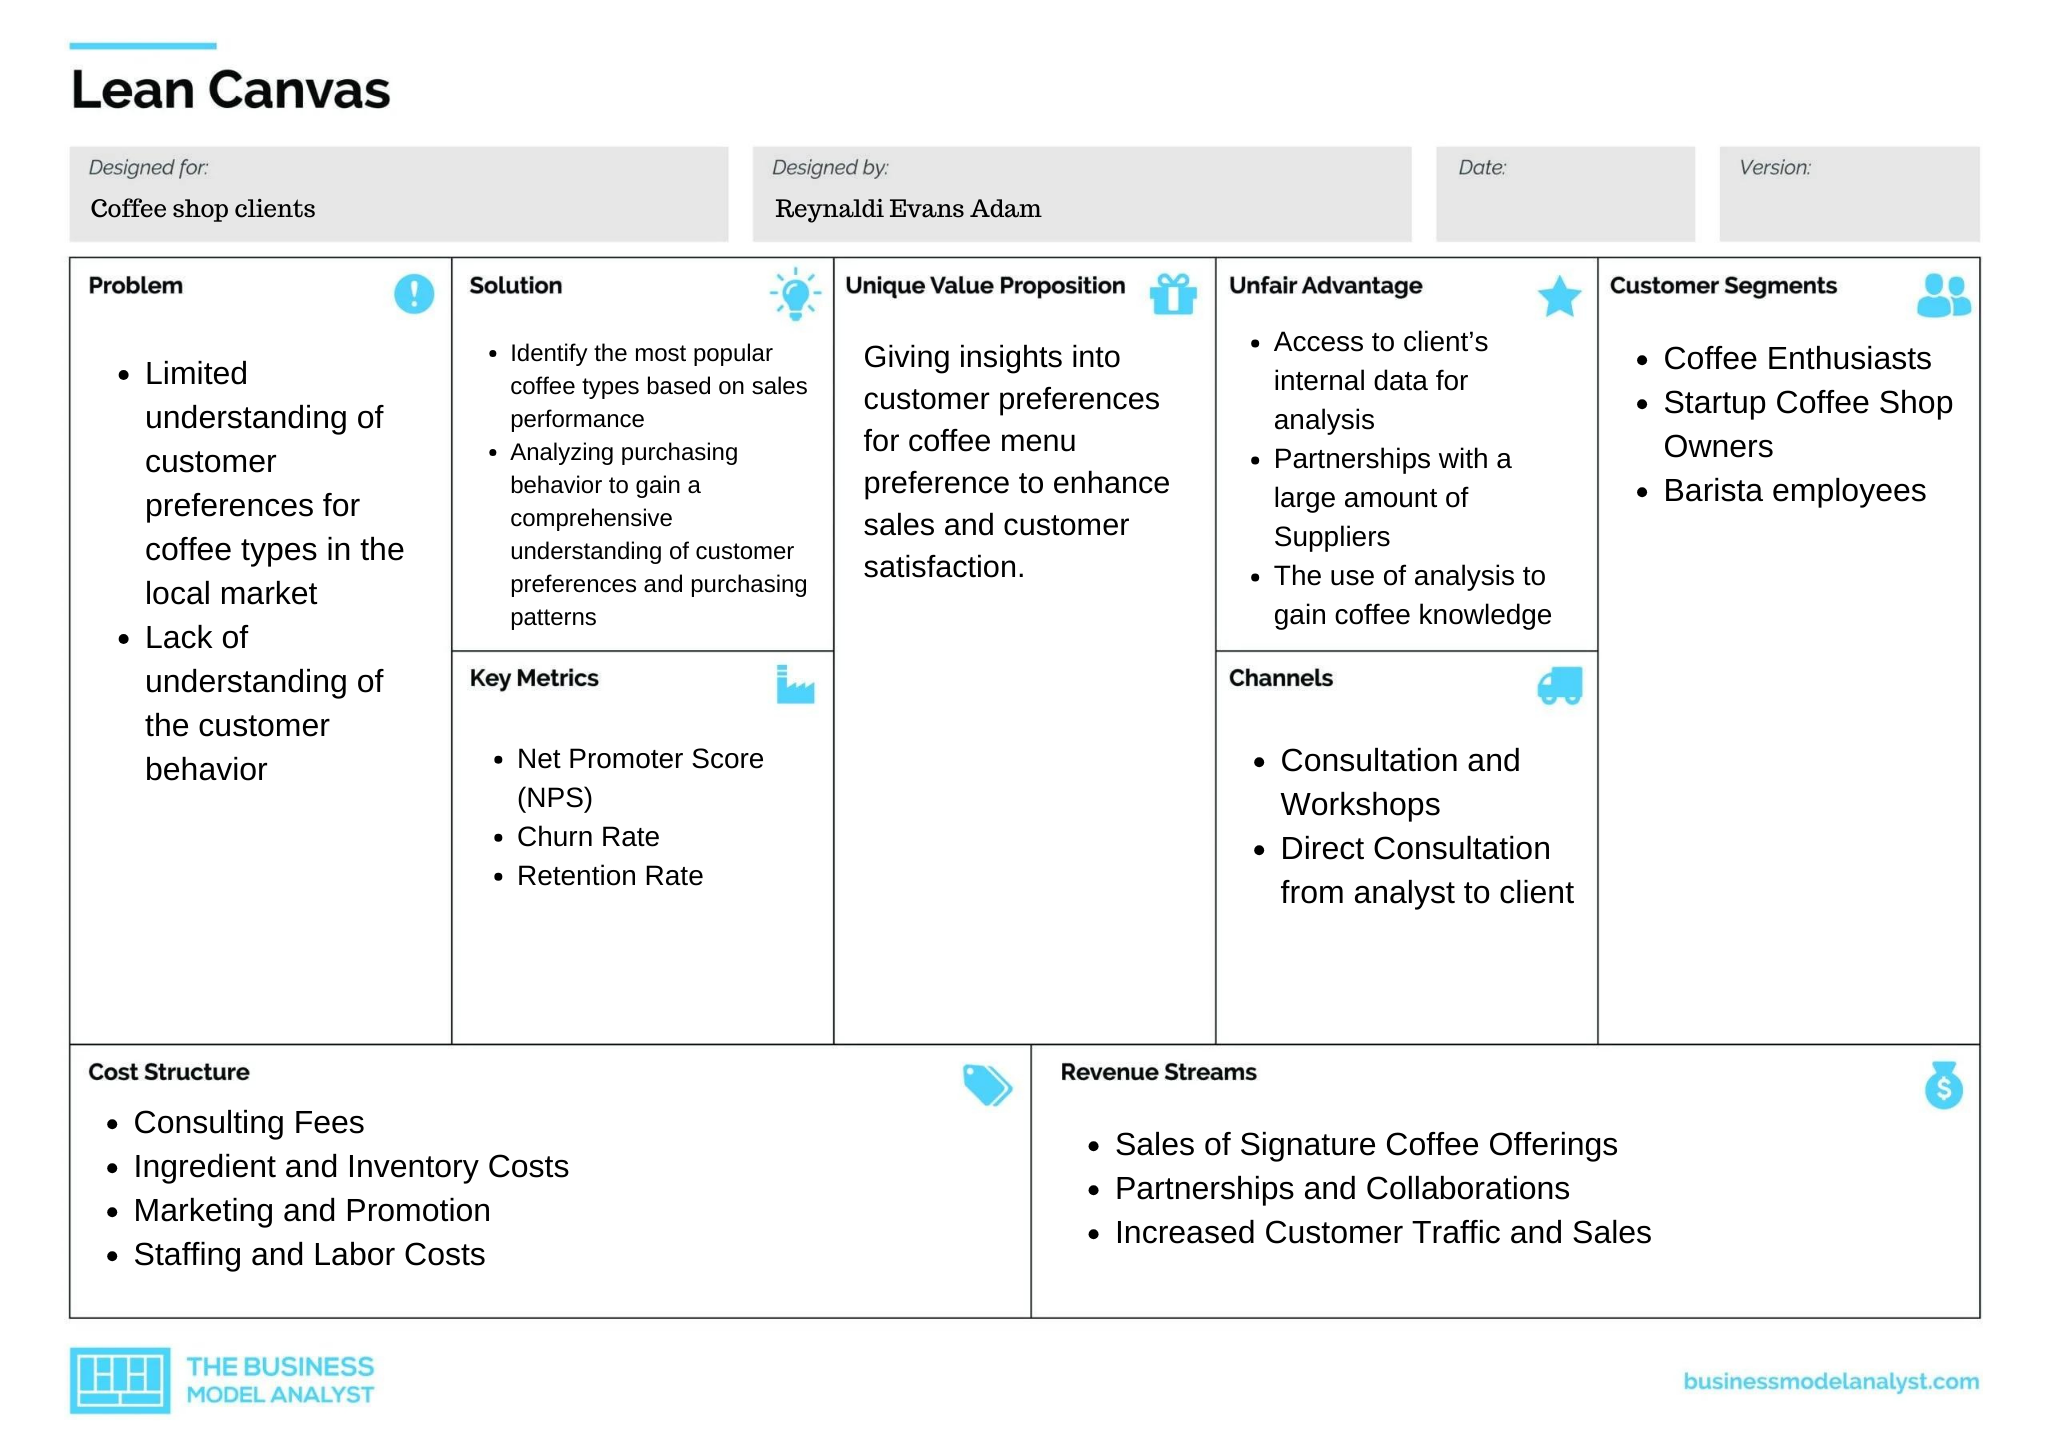

In [2]:
#Displaying the problem elaboration
from IPython.display import Image
Image(filename="./Lean Canvas.png")

# Data Loading

In [3]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
import plotly.graph_objs as go

In [4]:
# Importing the dataset by using the dataframe library
df = pd.read_excel('Coffee Shop Sales.xlsx')

df.head(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
5,6,2023-01-01,07:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone
6,7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
7,8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm
8,9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg
9,10,2023-01-01,07:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg


In [5]:
# Exploring the data type of the coffee sales dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [6]:
#Checking the value of each categories
df['product_category'].value_counts()

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

In [7]:
#Inspecting any null values in the dataset
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [8]:
#Inspecting any null values in the dataset
df.duplicated().sum()

0

Since our analysis will be focusing on coffee, we will be excluding all the product category besides coffee

In [9]:
#Filtering the needed category for analysis
kopi = df[df['product_category'] == "Coffee"]

kopi.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
6,7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
7,8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm
8,9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg


In [10]:
#Exploring the coffee brewing type
kopi['product_type'].value_counts()

product_type
Gourmet brewed coffee    16912
Barista Espresso         16403
Organic brewed coffee     8489
Drip coffee               8477
Premium brewed coffee     8135
Name: count, dtype: int64

In [11]:
#Exploring the coffee type
kopi['product_detail'].value_counts()

product_detail
Columbian Medium Roast Rg      3013
Latte                          2990
Our Old Time Diner Blend Sm    2919
Jamaican Coffee River Lg       2911
Brazilian Rg                   2904
Latte Rg                       2896
Our Old Time Diner Blend Rg    2894
Ethiopia Rg                    2866
Ethiopia Sm                    2833
Brazilian Sm                   2814
Cappuccino                     2793
Cappuccino Lg                  2772
Brazilian Lg                   2771
Ethiopia Lg                    2741
Columbian Medium Roast Lg      2731
Espresso shot                  2730
Columbian Medium Roast Sm      2728
Our Old Time Diner Blend Lg    2664
Jamaican Coffee River Sm       2630
Jamaican Coffee River Rg       2594
Ouro Brasileiro shot           2222
Name: count, dtype: int64

# Data Cleaning

In [12]:
#Looking at the filtered dataset
kopi

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
6,7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
7,8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm
8,9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg
...,...,...,...,...,...,...,...,...,...,...,...
149103,149444,2023-06-30,19:51:59,2,3,Astoria,26,3.00,Coffee,Organic brewed coffee,Brazilian Rg
149104,149445,2023-06-30,19:52:28,2,3,Astoria,34,2.45,Coffee,Premium brewed coffee,Jamaican Coffee River Sm
149105,149446,2023-06-30,19:53:46,1,3,Astoria,24,3.00,Coffee,Drip coffee,Our Old Time Diner Blend Lg
149106,149447,2023-06-30,19:56:45,1,8,Hell's Kitchen,33,3.50,Coffee,Gourmet brewed coffee,Ethiopia Lg


In [13]:
#Re checking datatype
kopi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58416 entries, 0 to 149114
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    58416 non-null  int64         
 1   transaction_date  58416 non-null  datetime64[ns]
 2   transaction_time  58416 non-null  object        
 3   transaction_qty   58416 non-null  int64         
 4   store_id          58416 non-null  int64         
 5   store_location    58416 non-null  object        
 6   product_id        58416 non-null  int64         
 7   unit_price        58416 non-null  float64       
 8   product_category  58416 non-null  object        
 9   product_type      58416 non-null  object        
 10  product_detail    58416 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 5.3+ MB


In [14]:
#Changing the format of datatype into time
kopi['transaction_time'] = pd.to_datetime(kopi['transaction_time'], format='%H:%M:%S')

kopi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58416 entries, 0 to 149114
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    58416 non-null  int64         
 1   transaction_date  58416 non-null  datetime64[ns]
 2   transaction_time  58416 non-null  datetime64[ns]
 3   transaction_qty   58416 non-null  int64         
 4   store_id          58416 non-null  int64         
 5   store_location    58416 non-null  object        
 6   product_id        58416 non-null  int64         
 7   unit_price        58416 non-null  float64       
 8   product_category  58416 non-null  object        
 9   product_type      58416 non-null  object        
 10  product_detail    58416 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 5.3+ MB


C:\Users\Reynaldi Evans Adam\AppData\Local\Temp\ipykernel_26416\2039918066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kopi['transaction_time'] = pd.to_datetime(kopi['transaction_time'], format='%H:%M:%S')


As we can see, there is a column representing the transaction date and time. In this case we will be merging the 2 columns for better readability and analysis

In [15]:
#Merging both columns of date and time into datetime
kopi['transaction_datetime'] = kopi['transaction_date'] + pd.to_timedelta(kopi['transaction_time'].dt.strftime('%H:%M:%S'))

kopi.head()

C:\Users\Reynaldi Evans Adam\AppData\Local\Temp\ipykernel_26416\2580925200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kopi['transaction_datetime'] = kopi['transaction_date'] + pd.to_timedelta(kopi['transaction_time'].dt.strftime('%H:%M:%S'))


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_datetime
0,1,2023-01-01,1900-01-01 07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01 07:06:11
3,4,2023-01-01,1900-01-01 07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023-01-01 07:20:24
6,7,2023-01-01,1900-01-01 07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023-01-01 07:25:49
7,8,2023-01-01,1900-01-01 07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,2023-01-01 07:33:34
8,9,2023-01-01,1900-01-01 07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg,2023-01-01 07:39:13


In [16]:
#replacing the order of transaction date time from the last index into the second
kopi.insert(2, 'transaction_datetime', kopi.pop('transaction_datetime'))

kopi.head() #Displaying the result of the order replacement

,transaction_id,transaction_date,transaction_datetime,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,2023-01-01 07:06:11,1900-01-01 07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
3,4,2023-01-01,2023-01-01 07:20:24,1900-01-01 07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
6,7,2023-01-01,2023-01-01 07:25:49,1900-01-01 07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
7,8,2023-01-01,2023-01-01 07:33:34,1900-01-01 07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm
8,9,2023-01-01,2023-01-01 07:39:13,1900-01-01 07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg


In [17]:
#Displaying the values of product detail a.k.a the coffee type
kopi['product_detail'].value_counts() 

product_detail
Columbian Medium Roast Rg      3013
Latte                          2990
Our Old Time Diner Blend Sm    2919
Jamaican Coffee River Lg       2911
Brazilian Rg                   2904
Latte Rg                       2896
Our Old Time Diner Blend Rg    2894
Ethiopia Rg                    2866
Ethiopia Sm                    2833
Brazilian Sm                   2814
Cappuccino                     2793
Cappuccino Lg                  2772
Brazilian Lg                   2771
Ethiopia Lg                    2741
Columbian Medium Roast Lg      2731
Espresso shot                  2730
Columbian Medium Roast Sm      2728
Our Old Time Diner Blend Lg    2664
Jamaican Coffee River Sm       2630
Jamaican Coffee River Rg       2594
Ouro Brasileiro shot           2222
Name: count, dtype: int64

We can assume that the data containing **Rg, Lg, Sm** as the size of the coffee (Regular, Large, Small). Since we will be focusing more on the coffee type we will be deleting the size of the coffee and merge them into one category

In [18]:
#Replacing Coffee size
kopi['product_detail'] = kopi['product_detail'].str.replace('Rg', '')
kopi['product_detail'] = kopi['product_detail'].str.replace('Lg', '')
kopi['product_detail'] = kopi['product_detail'].str.replace('Sm', '')

kopi['product_detail'].value_counts() #Checking the value count again

C:\Users\Reynaldi Evans Adam\AppData\Local\Temp\ipykernel_26416\1071797972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kopi['product_detail'] = kopi['product_detail'].str.replace('Rg', '')
C:\Users\Reynaldi Evans Adam\AppData\Local\Temp\ipykernel_26416\1071797972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kopi['product_detail'] = kopi['product_detail'].str.replace('Lg', '')
C:\Users\Reynaldi Evans Adam\AppData\Local\Temp\ipykernel_26416\1071797972.py:4: SettingWithCopyWarning: 
A value is t

product_detail
Brazilian                    8489
Our Old Time Diner Blend     8477
Columbian Medium Roast       8472
Ethiopia                     8440
Jamaican Coffee River        8135
Latte                        2990
Latte                        2896
Cappuccino                   2793
Cappuccino                   2772
Espresso shot                2730
Ouro Brasileiro shot         2222
Name: count, dtype: int64

In the result above, we can see that there are still duplicate data. But this is in fact not duplicate data. The double data are displayed because there are still whitespaces remaining

In [19]:
#Deleting Whitespaces
kopi['product_detail'] = kopi['product_detail'].str.strip()

kopi['product_detail'].value_counts() #Checking if the cleaning succeeded

C:\Users\Reynaldi Evans Adam\AppData\Local\Temp\ipykernel_26416\282002953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kopi['product_detail'] = kopi['product_detail'].str.strip()


product_detail
Brazilian                   8489
Our Old Time Diner Blend    8477
Columbian Medium Roast      8472
Ethiopia                    8440
Jamaican Coffee River       8135
Latte                       5886
Cappuccino                  5565
Espresso shot               2730
Ouro Brasileiro shot        2222
Name: count, dtype: int64

We can now drop the unnecessary columns.

- We are dropping store id because we will be calling the value of store by the location and calling the store by its id will be unnecessary
- For product id, similar reason as store id
- We are dropping product category because i have filtered all the product category as coffee. Therefore, i considered this column as redundant
- For transaction date and time, since we have merged the date and time into *transaction_datetime*, we can consider this redundant and drop the columns

In [20]:
#Dropping unnecessary columns
kopi.drop(columns=['store_id', 'product_id', 'product_category', 'transaction_date', 'transaction_time'], inplace=True)

kopi #Displaying the result

C:\Users\Reynaldi Evans Adam\AppData\Local\Temp\ipykernel_26416\3818342645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kopi.drop(columns=['store_id', 'product_id', 'product_category', 'transaction_date', 'transaction_time'], inplace=True)


,transaction_id,transaction_datetime,transaction_qty,store_location,unit_price,product_type,product_detail
0,1,2023-01-01 07:06:11,2,Lower Manhattan,3.00,Gourmet brewed coffee,Ethiopia
3,4,2023-01-01 07:20:24,1,Lower Manhattan,2.00,Drip coffee,Our Old Time Diner Blend
6,7,2023-01-01 07:25:49,1,Lower Manhattan,2.00,Drip coffee,Our Old Time Diner Blend
7,8,2023-01-01 07:33:34,2,Lower Manhattan,2.00,Gourmet brewed coffee,Columbian Medium Roast
8,9,2023-01-01 07:39:13,1,Lower Manhattan,4.25,Barista Espresso,Latte
...,...,...,...,...,...,...,...
149103,149444,2023-06-30 19:51:59,2,Astoria,3.00,Organic brewed coffee,Brazilian
149104,149445,2023-06-30 19:52:28,2,Astoria,2.45,Premium brewed coffee,Jamaican Coffee River
149105,149446,2023-06-30 19:53:46,1,Astoria,3.00,Drip coffee,Our Old Time Diner Blend
149106,149447,2023-06-30 19:56:45,1,Hell's Kitchen,3.50,Gourmet brewed coffee,Ethiopia


In [21]:
#Naming product type and coffee type into brewing type and coffee type for better data readability
kopi = kopi.rename(columns={'product_type': 'brewing_type', 'product_detail': 'coffee_type'})

kopi # displaying the result

,transaction_id,transaction_datetime,transaction_qty,store_location,unit_price,brewing_type,coffee_type
0,1,2023-01-01 07:06:11,2,Lower Manhattan,3.00,Gourmet brewed coffee,Ethiopia
3,4,2023-01-01 07:20:24,1,Lower Manhattan,2.00,Drip coffee,Our Old Time Diner Blend
6,7,2023-01-01 07:25:49,1,Lower Manhattan,2.00,Drip coffee,Our Old Time Diner Blend
7,8,2023-01-01 07:33:34,2,Lower Manhattan,2.00,Gourmet brewed coffee,Columbian Medium Roast
8,9,2023-01-01 07:39:13,1,Lower Manhattan,4.25,Barista Espresso,Latte
...,...,...,...,...,...,...,...
149103,149444,2023-06-30 19:51:59,2,Astoria,3.00,Organic brewed coffee,Brazilian
149104,149445,2023-06-30 19:52:28,2,Astoria,2.45,Premium brewed coffee,Jamaican Coffee River
149105,149446,2023-06-30 19:53:46,1,Astoria,3.00,Drip coffee,Our Old Time Diner Blend
149106,149447,2023-06-30 19:56:45,1,Hell's Kitchen,3.50,Gourmet brewed coffee,Ethiopia


In [22]:
#Changing the type of id into string so it won't be iterated
kopi['transaction_id'] = kopi['transaction_id'].astype(str)

kopi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58416 entries, 0 to 149114
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   transaction_id        58416 non-null  object        
 1   transaction_datetime  58416 non-null  datetime64[ns]
 2   transaction_qty       58416 non-null  int64         
 3   store_location        58416 non-null  object        
 4   unit_price            58416 non-null  float64       
 5   brewing_type          58416 non-null  object        
 6   coffee_type           58416 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 3.6+ MB


# Analisis dan perhitungan

## Descriptive Statistics

In [23]:
kopi.describe() #Displaying the simple descriptive statistics including central tendency, the quantile and the dispersion

,transaction_datetime,transaction_qty,unit_price
count,58416,58416.000000,58416.000000
mean,2023-04-16 03:24:55.747123968,1.527835,3.023646
min,2023-01-01 07:06:11,1.000000,2.000000
25%,2023-03-06 11:53:18,1.000000,2.450000
50%,2023-04-24 14:28:40,2.000000,3.000000
75%,2023-05-30 10:13:34.750000128,2.000000,3.500000
max,2023-06-30 20:57:19,4.000000,4.250000
std,NaN,0.551278,0.683111


the describe function suggests that the dataset contains transaction records with varying quantities and prices, spanning from January 1st, 2023, to June 30th, 2023. The majority of transactions involve quantities between 1 and 2, with prices ranging from $2 to $4.25

In [24]:
#Identifying skew and kurtosis to analyze outliers and the data distribution
skew_kuantitas = kopi['transaction_qty'].skew() #skewness of quantity
kurt_kuantitas = kopi['transaction_qty'].kurtosis() #kurtosis of quantity

skew_harga = kopi['unit_price'].skew() #skewness of price
kurt_harga = kopi['unit_price'].kurtosis() #kurtosis of price

#Displaying the results of each skewness and kurtosis
print(f"Skewness Transaction Quantity = {skew_kuantitas}")
print(f"Kurtosis Transaction Quantity = {kurt_kuantitas}")
print()

print(f"Skewness Price = {skew_harga}")
print(f"Kurtosis Harga = {kurt_harga}")

Skewness Transaction Quantity = 0.38071431369392156
Kurtosis Transaction Quantity = -0.9264983642479607

Skewness Price = 0.17369790751652714
Kurtosis Harga = -0.9875327245102059


The skewness of the transaction quantity distribution indicates a moderate right skewness, suggesting a slight tendency for more transactions to occur at lower quantities. The negative kurtosis value implies a relatively flat peak and lighter tails compared to a normal distribution, indicating fewer extreme values in the distribution. 

Similarly, the price distribution exhibits a slight right skewness and a negative kurtosis, suggesting similar characteristics of distribution shape and tail heaviness as observed in the transaction quantity distribution

We'll calculate the expected income per coffee transaction and establish a confidence interval around this estimate. By determining the range within which the true mean income per transaction is likely to fall, we can better understand the financial implications of our sales data. Let's dive into the analysis and calculate the confidence interval.

But first, let us count the income for every transaction before executing the confidence interval

In [15]:
# Calculate income for each transaction
kopi_income = kopi['transaction_qty'] * kopi['unit_price']

# Display the calculated income
print(kopi_income)

0         6.00
3         2.00
6         2.00
7         4.00
8         4.25
          ... 
149103    6.00
149104    4.90
149105    3.00
149106    3.50
149114    3.75
Length: 58416, dtype: float64


After we have the income for each transaction occured, let us calculate the confidence interval

In [18]:
mean_income = kopi_income.mean() #Calculating the mean
std_income = kopi_income.std() #Calculating the standard deviation
N = len(kopi_income) #the amount of income
low, up = stats.norm.interval(0.95,loc=mean_income,scale=std_income/np.sqrt(N)) #using confidence interval to calculate
print(f'Lower Level = {low}')
print(f'Upper Level= {up}')


Lower Level = 4.6049584155850285
Upper Level= 4.6374563337987


The expected income per coffee transaction is estimated to be $4.62, with a 95% confidence interval ranging from $4.60 to $4.64. This means that we can be confident that the true mean income per transaction falls within this range.

In [25]:
#Checking dataframe for visualization purposes
kopi

,transaction_id,transaction_datetime,transaction_qty,store_location,unit_price,brewing_type,coffee_type
0,1,2023-01-01 07:06:11,2,Lower Manhattan,3.00,Gourmet brewed coffee,Ethiopia
3,4,2023-01-01 07:20:24,1,Lower Manhattan,2.00,Drip coffee,Our Old Time Diner Blend
6,7,2023-01-01 07:25:49,1,Lower Manhattan,2.00,Drip coffee,Our Old Time Diner Blend
7,8,2023-01-01 07:33:34,2,Lower Manhattan,2.00,Gourmet brewed coffee,Columbian Medium Roast
8,9,2023-01-01 07:39:13,1,Lower Manhattan,4.25,Barista Espresso,Latte
...,...,...,...,...,...,...,...
149103,149444,2023-06-30 19:51:59,2,Astoria,3.00,Organic brewed coffee,Brazilian
149104,149445,2023-06-30 19:52:28,2,Astoria,2.45,Premium brewed coffee,Jamaican Coffee River
149105,149446,2023-06-30 19:53:46,1,Astoria,3.00,Drip coffee,Our Old Time Diner Blend
149106,149447,2023-06-30 19:56:45,1,Hell's Kitchen,3.50,Gourmet brewed coffee,Ethiopia


For visualization, i have made 4 graphs:

- Bar graph to display total coffee sales by their brewing type
- Total sales for each location
- Total sales per time interval
- Distribution of the coffee's price

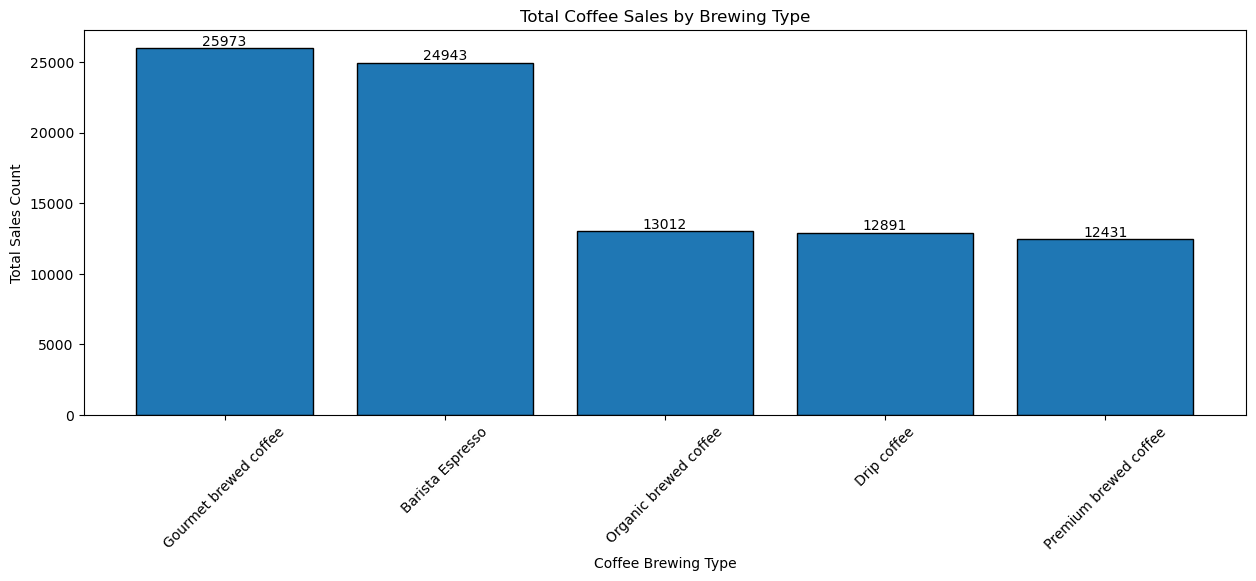

In [26]:
# Group by product_detail and sum transaction quantities
sum_by_coffee_type = kopi.groupby('brewing_type')['transaction_qty'].sum().reset_index()

sum_by_coffee_type_sorted = sum_by_coffee_type.sort_values(by='transaction_qty', ascending=False)

# Create a bar chart
plt.figure(figsize=(15, 5))  
bars = plt.bar(sum_by_coffee_type_sorted['brewing_type'], sum_by_coffee_type_sorted['transaction_qty'], edgecolor = 'black')

# Add value labels directly above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, height, ha='center', va='bottom')

# Add labels and title
plt.xlabel('Coffee Brewing Type')
plt.ylabel('Total Sales Count')  
plt.title('Total Coffee Sales by Brewing Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


Using this graph, we can gain an insight for equipment preparation. That way coffee shops can use their expenses properly on what equipment should we add to increase production's efficiency

In [27]:
# Group by store branches and find the most bought item in each branch
sales_per_branch = kopi.groupby('store_location')['unit_price'].sum()

# Create a horizontal bar chart
fig = go.Figure(data=[
    go.Bar(y=sales_per_branch.index, x=sales_per_branch.values, orientation='h')
])


fig.update_layout(title='Total Sales per location',
                  xaxis_title='Total Sales',
                  yaxis_title='Store Branch') #Labeling the graph title, the x land y label


By displaying total sales per location, the insight gain from this graph for customer profiling. Potential reasons might be the number of customers who live nearby or the store branch's ambience, etc.

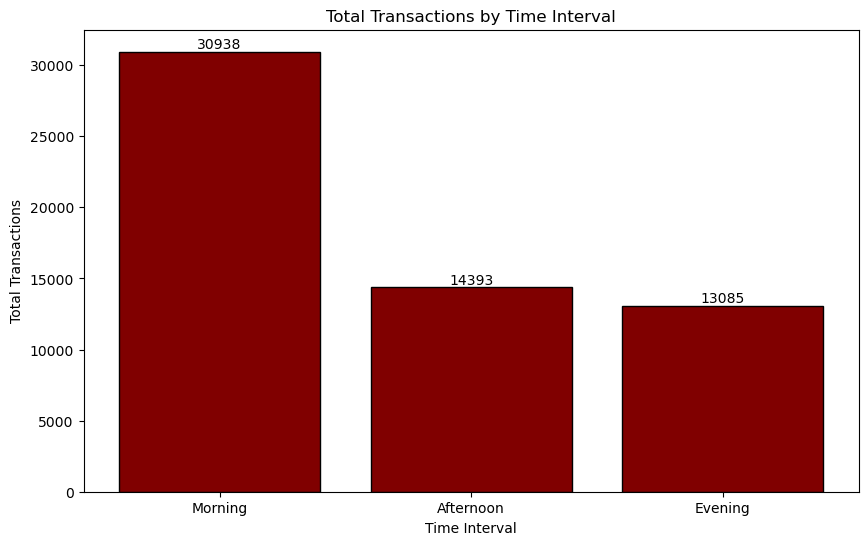

In [28]:
# Extract hour from transaction time
kopi['hour'] = kopi['transaction_datetime'].dt.hour

# Categorize transactions into time intervals
def categorize_time(hour):
    if hour >= 6 and hour < 12:
      return 'Morning'
    elif hour >= 12 and hour < 16:
      return 'Afternoon'
    else:
       return 'Evening'

kopi['time_interval'] = kopi['hour'].apply(categorize_time)

# Calculate total transactions for each time interval
total_transactions = kopi['time_interval'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
bar_plot = plt.bar(total_transactions.index, total_transactions, color='maroon', edgecolor='black')

# Add value labels directly above each bar
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, height, ha='center', va='bottom')

# Add labels and title
plt.xlabel('Time Interval')
plt.ylabel('Total Transactions')
plt.title('Total Transactions by Time Interval')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.show()


By displaying the graph above, we can get an insight of the time customers usually buy coffee

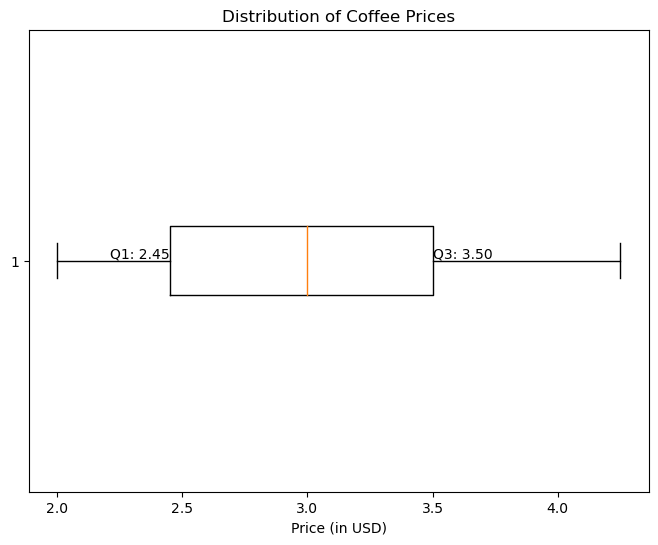

In [29]:
# Calculate quartiles 
q1 = kopi['unit_price'].quantile(0.25)
q3 = kopi['unit_price'].quantile(0.75)

# Create a box plot for product prices
plt.figure(figsize=(8, 6))
plt.boxplot(kopi['unit_price'], vert=False)

# Add quartile annotations
plt.text(q1, 1, f'Q1: {q1:.2f}', verticalalignment='bottom', horizontalalignment='right', color='black')
plt.text(q3, 1, f'Q3: {q3:.2f}', verticalalignment='bottom', horizontalalignment='left', color='black')

# Add labels and title
plt.xlabel('Price (in USD)')
plt.title('Distribution of Coffee Prices')

# Show the plot
plt.show()


the box plot above shows the price distribution and in here, the insight gained is to set a competitive price for each coffee

## Inferential Statistics

We will now find a correlation between 2 column based on the main analysis. We will be using the transaction quantity and the transaction's time interval to prove that there is correlation between the amount of transaction and when did the transaction occur

Null Hypothesis (H0): There is no significant correlation between the transaction quantity and the time of the day when coffee purchases occur.

Alternative Hypothesis (H1): There is a significant correlation between the transaction quantity and the time of the day when coffee purchases occur.

In [37]:
corr_tau, pval_k = stats.kendalltau(kopi['transaction_qty'], kopi['time_interval']) #implementing the kendall's tau

print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}") #printing the tau-correlation and its p-value

crit_lvl = 0.05

if pval_k < crit_lvl:
    print("Reject the null hypothesis (H0): There is a significant correlation between the transaction quantity and the time of day when coffee purchases occur.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant correlation between the transaction quantity and the time of day when coffee purchases occur.")


tau-correlation: 0.01, p-value: 0.002357032024499444
Reject the null hypothesis (H0): There is a significant correlation between the transaction quantity and the time of day when coffee purchases occur.


From the tau-correlation analysis, we found that the p-value is lower than the critical level, indicating a statistically significant correlation between the transaction quantity and the time of day when coffee purchases occur.

For another inferential statistics, we have found that customers tend to buy gourmet brewed coffee the most with barista brewed espresso coffee being the second. Let us if this statement can actually represent the whole customer who have bought gourmet brewed coffee and barista brewed espresso.

**Null Hypothesis (H0)**: There is no significant difference in the mean transaction quantity between "Gourmet brewed coffee" and "Barista Blend Espresso" purchases.

**Alternative Hypothesis (H1)**: The transaction quantity for "Gourmet brewed coffee" purchases is significantly different from the mean transaction quantity for "Barista Blend Espresso" purchases.

In [31]:
kopi['brewing_type'].value_counts() #Checking value count to see the highest amount of value found in the brewing type

brewing_type
Gourmet brewed coffee    16912
Barista Espresso         16403
Organic brewed coffee     8489
Drip coffee               8477
Premium brewed coffee     8135
Name: count, dtype: int64

Since we would like to test if customer prefers either gourmet brewed coffee or barista blend espresso coffee, we will be using the two sample independent t-test

In [32]:
#Conducting two sample independent t-test
gourmet_brewed_transactions = kopi[kopi['brewing_type'] == 'Gourmet brewed coffee']['transaction_qty']
barista_blend_transactions = kopi[kopi['brewing_type'] == 'Barista Espresso']['transaction_qty']

t_statistic, p_value = ttest_ind(gourmet_brewed_transactions, barista_blend_transactions, equal_var=False)

#Adjusting the critical level to 0.05
crit_lvl = 0.05

#printing the result of t-statistics and the p-value
print(f"t-statistic = {t_statistic}")
print(f"p-value = {p_value}")

#Print the result of the inferential analysis
if p_value < crit_lvl:
  print("Reject the null hypothesis (H0): There is a significant difference in the transaction quantity between 'Gourmet brewed coffee' and 'Barista Blend Espresso' purchases.")
else:
  print("Fail to reject the null hypothesis (H0): There is no significant difference in the transaction quantity between 'Gourmet brewed coffee' and 'Barista Blend Espresso' purchases.")

t-statistic = 2.4889011576686055
p-value = 0.012818708703690028
Reject the null hypothesis (H0): There is a significant difference in the transaction quantity between 'Gourmet brewed coffee' and 'Barista Blend Espresso' purchases.


Since the p-value is less than the commonly chosen significance level of 0.05, we have sufficient evidence to reject the null hypothesis. Therefore, we conclude that there is a statistically significant difference in the transaction quantity between "Gourmet brewed coffee" and "Barista Blend Espresso" purchases

In [33]:
kopi #Final check before exporting to csv

,transaction_id,transaction_datetime,transaction_qty,store_location,unit_price,brewing_type,coffee_type,hour,time_interval
0,1,2023-01-01 07:06:11,2,Lower Manhattan,3.00,Gourmet brewed coffee,Ethiopia,7,Morning
3,4,2023-01-01 07:20:24,1,Lower Manhattan,2.00,Drip coffee,Our Old Time Diner Blend,7,Morning
6,7,2023-01-01 07:25:49,1,Lower Manhattan,2.00,Drip coffee,Our Old Time Diner Blend,7,Morning
7,8,2023-01-01 07:33:34,2,Lower Manhattan,2.00,Gourmet brewed coffee,Columbian Medium Roast,7,Morning
8,9,2023-01-01 07:39:13,1,Lower Manhattan,4.25,Barista Espresso,Latte,7,Morning
...,...,...,...,...,...,...,...,...,...
149103,149444,2023-06-30 19:51:59,2,Astoria,3.00,Organic brewed coffee,Brazilian,19,Evening
149104,149445,2023-06-30 19:52:28,2,Astoria,2.45,Premium brewed coffee,Jamaican Coffee River,19,Evening
149105,149446,2023-06-30 19:53:46,1,Astoria,3.00,Drip coffee,Our Old Time Diner Blend,19,Evening
149106,149447,2023-06-30 19:56:45,1,Hell's Kitchen,3.50,Gourmet brewed coffee,Ethiopia,19,Evening


In [34]:
kopi.drop(columns='hour', inplace=True) #drop the column hour used to identify time intervals

kopi

,transaction_id,transaction_datetime,transaction_qty,store_location,unit_price,brewing_type,coffee_type,time_interval
0,1,2023-01-01 07:06:11,2,Lower Manhattan,3.00,Gourmet brewed coffee,Ethiopia,Morning
3,4,2023-01-01 07:20:24,1,Lower Manhattan,2.00,Drip coffee,Our Old Time Diner Blend,Morning
6,7,2023-01-01 07:25:49,1,Lower Manhattan,2.00,Drip coffee,Our Old Time Diner Blend,Morning
7,8,2023-01-01 07:33:34,2,Lower Manhattan,2.00,Gourmet brewed coffee,Columbian Medium Roast,Morning
8,9,2023-01-01 07:39:13,1,Lower Manhattan,4.25,Barista Espresso,Latte,Morning
...,...,...,...,...,...,...,...,...
149103,149444,2023-06-30 19:51:59,2,Astoria,3.00,Organic brewed coffee,Brazilian,Evening
149104,149445,2023-06-30 19:52:28,2,Astoria,2.45,Premium brewed coffee,Jamaican Coffee River,Evening
149105,149446,2023-06-30 19:53:46,1,Astoria,3.00,Drip coffee,Our Old Time Diner Blend,Evening
149106,149447,2023-06-30 19:56:45,1,Hell's Kitchen,3.50,Gourmet brewed coffee,Ethiopia,Evening


In [35]:
kopi.to_csv('Coffee Sales Filtered.csv', index=False) #Export to CSV for Tableau Visualization

# Pengambilan Kesimpulan

Our coffee sales analysis aimed to investigate various aspects of coffee sales and their associated factors. We performed exploratory data analysis to understand the distribution and trends in coffee sales, identifying the most popular coffee types and their sales patterns across different store branches. Additionally, we conducted inferential statistical tests to explore relationships between variables, such as the correlation between transaction quantity and brewing type, as well as differences in transaction quantity between specific coffee types.

Based on the analysis conducted, we have successfully identified the customer's buying behavior and preferences from the dataset. By focusing on the most-bought coffee types, we aim to increase the retention rate by 20% within the next 4 months. To measure the effectiveness of our strategy, we will utilize metrics such as Net Promoter Score (NPS), Churn Rate, and Retention Rate. This targeted approach will enable us to better understand customer preferences and tailor our strategies accordingly to drive growth and customer satisfaction in the coffee retail industry.

Our findings revealed that 'Gourmet brewed coffee' and 'Barista Blend Espresso' were the top-selling coffee brewing types, with statistically significant differences in their  transaction quantities proven from our inferential analysis. Furthermore, our analysis uncovered an interesting insight that customers tend to buy coffee primarily in the morning time interval, which ranges from 6am to 12pm. This suggests potential opportunities for targeted marketing or promotions during morning hours to capitalize on peak demand.

Moreover, from our box plot analysis of coffee prices, we found that the price of coffee ranged from the first quartile of $2.20 to the third quartile of $3.50, with a median price of $3.00. Interestingly, no outliers were identified in the box plot, indicating a relatively consistent pricing distribution. The minimum price observed was $2.00, while the maximum price, representing the most expensive coffee, was $4.75. These insights into coffee pricing can assist in pricing strategies and understanding consumer preferences

But in the dataset given, we found few difficulties while analyzing the dataset. A lot of the data types are mostly categorical and ordinal, making it difficult to analyze continuous data and finding an actual correlation between two columns. We did not find any customer profiling data, which is invaluable for demographics analysis such as customer age, customer name, etc. Additionally, it should be noted that our analysis lacks information about the total nominal amount of transactions made by customers. Having access to this data would provide a more comprehensive understanding of overall sales revenue and could further enhance our insights into coffee sales trends and patterns.


Overall, this analysis provides valuable insights into coffee sales trends and patterns, which can inform strategic decision-making for marketing, identify customer's buying preferences, inventory management, and product offerings within the coffee retail industry. Further research can be conducted if the dataset is updated with more details in the column.

# Tableau Link

url=https://public.tableau.com/views/Milestone1_17073727329490/CoffeeSalesAnalysis?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link